In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Brownian():
    """
    A Brownian motion class
    """
    def __init__(self,x0=0):
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """Generate motion by random walk        
        Arguments:
            n_step: Number of steps            
        Returns:
            A NumPy array with `n_steps` points
        """        
        w = np.ones(n_step)*self.x0        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))        
        return w
    
    def gen_normal(self,n_step=100):
        """Generate motion by drawing from the Normal distribution        
        Arguments:
            n_step: Number of steps            
        Returns:
            A NumPy array with `n_steps` points
        """
        w = np.ones(n_step)*self.x0        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))        
        return w
    
    def stock_price(
                    self,
                    s0=100,
                    mu=0.2,
                    sigma=0.68,
                    deltaT=52,
                    dt=0.1
                    ):
        """
        Models a stock price S(t) using the Weiner process W(t) as
        `S(t) = S(0).exp{(mu-(sigma^2/2).t)+sigma.W(t)}`
        
        Arguments:
            s0: Iniital stock price, default 100
            mu: 'Drift' of the stock (upwards or downwards), default 1
            sigma: 'Volatility' of the stock, default 1
            deltaT: The time period for which the future prices are computed, default 52 (as in 52 weeks)
            dt (optional): The granularity of the time-period, default 0.1
        
        Returns:
            s: A NumPy array with the simulated stock prices over the time-period deltaT
        """
        n_step = int(deltaT/dt)
        time_vector = np.linspace(0,deltaT,num=n_step)
        # Stock variation
        stock_var = (mu-(sigma**2/2))*time_vector
        # Forcefully set the initial value to zero for the stock price simulation
        self.x0=0
        # Weiner process (calls the `gen_normal` method)
        weiner_process = sigma*self.gen_normal(n_step)
        # Add two time series, take exponent, and multiply by the initial stock price
        s = s0*(np.exp(stock_var+weiner_process))
        
        return s

In [8]:
b = Brownian(20)
# initial value of 20 and using random walk

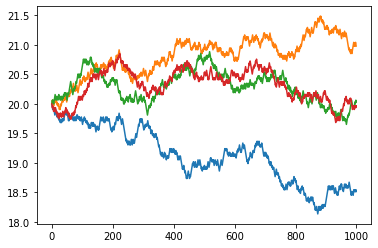

In [9]:
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()

In [11]:
b = Brownian(20)
# initial value of 20 and using normal disribution

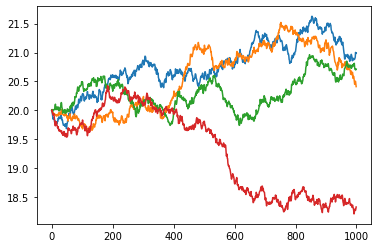

In [12]:
for i in range(4):
    plt.plot(b.gen_normal(1000))
plt.show()

Stock price simulation:
Here we simulate multiple scenarios with for 52 time periods (imagining 52 weeks a year). Note, all the stock proces start at the same point but evolve randomly along different trajectories. The dynamics is controlled by the mean and variance parameters of the underlying Normal distribution, which, emulate the growth trend and the 'volatility' of the stock.

In [13]:
def plot_stock_price(mu,sigma):
    """
    Plots stock price for multiple scenarios
    """
    plt.figure(figsize=(9,4))
    for i in range(5):
        plt.plot(b.stock_price(mu=mu,
                               sigma=sigma,
                               dt=0.1))
    plt.legend(['Scenario-'+str(i) for i in range(1,6)],
               loc='upper left')
    plt.hlines(y=100,xmin=0,xmax=520,
               linestyle='--',color='k')
    plt.show()

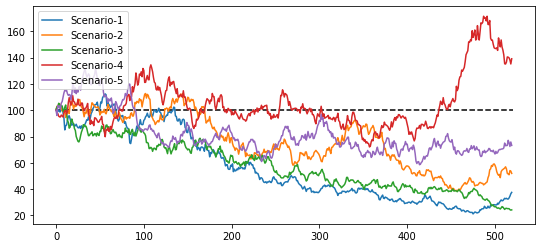

In [19]:
plot_stock_price(mu=0.2,sigma=0.65)

Two-dimensional plot: Here is shown a two-dimensional Brownian motion much like what an actual suspended particle in the fluid medium goes through.

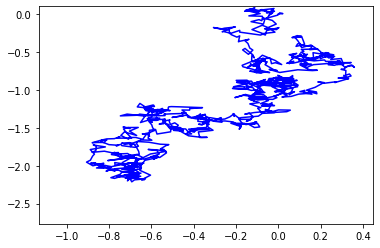

In [20]:
b1 = Brownian()
b2 = Brownian()

x = b1.gen_normal(1000)
y = b2.gen_normal(1000)

plt.plot(x,y,c='b')
xmax,xmin,ymax,ymin = x.max(),x.min(),y.max(),y.min()
scale_factor = 1.25
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()